[[3165.88500606]
 [ 257.72261867]]


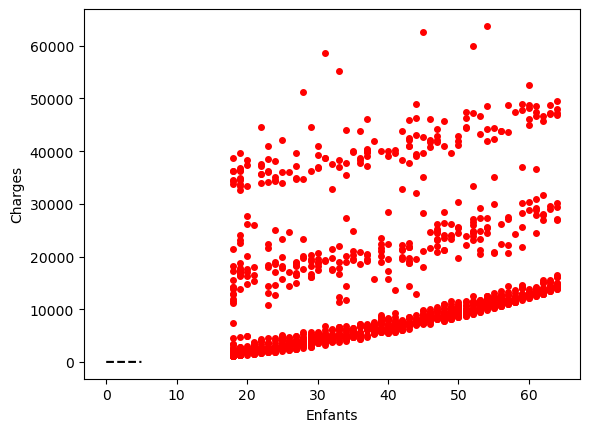

In [15]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#On charge le dataset
house_data = pd.read_csv('insurance.csv')
#house_data = house_data[house_data['loyer'] < 10000]

#définir le nom des colonnes
analysed = "charges"
analysing = "children"

#On affiche le nuage de points dont on dispose
#plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
#plt.show()

# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
#house_data['sex'].values
#house_data['age'].values
X = np.matrix( [np.ones (house_data.shape[0]), house_data[analysing].values]).T
y= np.matrix(house_data[analysed]).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot (y)

print(theta)

plt.xlabel('Enfants') 
# plt.xlabel('Sexe') 
# plt.xlabel('Age') 
plt.ylabel('Charges')

plt.plot(house_data[analysing], house_data[analysed], 'ro', markersize=4)

# On affiche la droite entre 0 et 5
# plt.plot([0,5], [theta.item(0), theta.item(0) + 5 * theta.item(1)], linestyle='--', c='#000000')
plt.plot([0,5], [0, 5], linestyle='--', c='#000000')

plt.show()